In [17]:
generate_instance(left_bound=1,
                  right_bound=1000000,
                  num_int=100000,
                  target=1000000, 
                  out_filename="cpp_implementations/input.txt",
                  verbose=True)

Generating a set with 100000 elements and target 1000000...
Sorting...
Done


([5,
  10,
  15,
  17,
  18,
  40,
  42,
  45,
  52,
  63,
  67,
  75,
  93,
  115,
  116,
  128,
  131,
  132,
  139,
  145,
  149,
  165,
  167,
  174,
  175,
  197,
  198,
  205,
  206,
  221,
  233,
  239,
  240,
  250,
  258,
  272,
  303,
  340,
  342,
  346,
  348,
  349,
  355,
  358,
  359,
  361,
  374,
  375,
  394,
  420,
  435,
  437,
  439,
  450,
  451,
  453,
  455,
  463,
  473,
  491,
  511,
  513,
  515,
  517,
  519,
  522,
  524,
  525,
  526,
  528,
  530,
  544,
  556,
  558,
  572,
  575,
  592,
  598,
  603,
  604,
  622,
  632,
  656,
  675,
  678,
  683,
  700,
  706,
  711,
  716,
  724,
  733,
  746,
  754,
  778,
  784,
  798,
  810,
  824,
  828,
  839,
  862,
  871,
  880,
  886,
  890,
  891,
  894,
  897,
  898,
  903,
  909,
  918,
  919,
  922,
  928,
  939,
  961,
  964,
  973,
  981,
  984,
  986,
  991,
  992,
  994,
  1009,
  1030,
  1037,
  1050,
  1056,
  1065,
  1066,
  1068,
  1069,
  1076,
  1077,
  1078,
  1082,
  1093,
  1099,
  1128,
  11

In [1]:
import math
import random
import numpy as np
import time
from numpy import polymul, pad, matmul
from numpy.fft import rfft, irfft, rfftn, irfftn, rfft2, irfft2, fft, fft2, ifft2
import math
from statistics import median
import subprocess
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
def generate_instance(left_bound, right_bound, num_int, target, out_filename, seed=None, verbose=False):
    if seed is not None:
        random.seed(seed)
    
    if verbose:
        print(f"Generating a set with {num_int} elements and target {target}...")
    set_ = random.sample(range(left_bound, right_bound+1), num_int) # set of integers
    if verbose:
        print("Sorting...")
    set_.sort()
    
#     if target > sum(set_):
#         print("--------------------------------------------------------------------------------")
#         print(f"Warning! Target {target} is unfeasible since it's too large (set sum is {sum(set_)})!")
#         print(f"Callback parameters: left_bound={left_bound}, right_bound={right_bound}, num_int={num_int}, target={target}, seed={seed}")
    
    with open(out_filename, 'w', encoding='utf-8') as fout:
        fout.write(' '.join(list(map(str, set_))))
        fout.write('\n')
        fout.write(str(target))
    if verbose:
        print("Done")
    return set_, target

# TEST
instance = generate_instance(left_bound=1000, right_bound=10000, num_int=100, target=10000, out_filename="cpp_implementations/input.txt")   

Run c++ code

In [3]:
# run cpp implementation of the algorithm 
def run_cpp_impl(alg_name, 
                 num_experiments,
                 exe_path = "x64\Release\cpp_implementations.exe",
                 alg_fin_path = "cpp_implementations\input.txt",
                 alg_fout_path = "cpp_implementations\output.txt",
                 verbose=False):
    if verbose:
        print(f"Running {alg_name}'s algorithm...")
    run = subprocess.run([exe_path, alg_fin_path, alg_fout_path, alg_name, str(num_experiments)])
    
    if run.returncode == 0:
        with open(alg_fout_path) as fout:
            res = fout.readline()
            time = fout.readline()
        if verbose:
            print(f"Done. Solution: {res}\n Time: {time}\n")
        return int(res), float(time)
    else:
        print("Error!")
        return None
# res = run_cpp_impl("bringmann", 1)  

In [4]:
def test_n_fixed(n, right_bound, t_upper_b, t_step):
    bellman_solutions = []
    bellman_times = []
    koiliaris_solutions = []
    koiliaris_times = []
    bringmann_solutions = []
    bringmann_times = []
    
    ts = list(range(right_bound, t_upper_b, t_step))
    

    for t in ts:
        generate_instance(left_bound=1,
                      right_bound=right_bound,
                      num_int=n,
                      target=t, 
                      out_filename="cpp_implementations/input.txt",
                      verbose=False, seed=42)

        bellman_times.append(run_cpp_impl("bellman", 1,
                                          alg_fin_path="cpp_implementations/input.txt", verbose=False)[1])
        koiliaris_times.append(run_cpp_impl("koiliaris_xu", 1,
                                          alg_fin_path="cpp_implementations/input.txt", verbose=False)[1])
        bringmann_times.append(run_cpp_impl("bringmann", 1,
                                          alg_fin_path="cpp_implementations/input.txt", verbose=False)[1])


    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot(ts, bellman_times, color="tab:blue", label="Dynamic")
    ax.plot(ts, koiliaris_times, color="tab:green", label="Koiliaris & Xu")
    ax.plot(ts, bringmann_times, color="tab:orange", label="Bringmann")

    ax.set_xlabel(f"Target integer (number of elements is fixed at {n})")
    ax.set_ylabel("Time (ms)")
    ax.grid()
    ax.legend()
    plt.show()
    
    
    return bellman_times, koiliaris_times, bringmann_times

In [5]:
def test_t_fixed(t, right_bound, n_upper_b, n_step):
    bellman_solutions = []
    bellman_times = []
    koiliaris_solutions = []
    koiliaris_times = []
    bringmann_solutions = []
    bringmann_times = []
    
    n_upper_b += 3
    ns = list(range(2, n_upper_b, n_step))
    

    for n in ns:
        generate_instance(left_bound=1,
                      right_bound=right_bound,
                      num_int=n,
                      target=t, 
                      out_filename="cpp_implementations/input.txt",
                      verbose=False)

        bellman_times.append(run_cpp_impl("bellman", 1,
                                          alg_fin_path="cpp_implementations/input.txt", verbose=False)[1])
        koiliaris_times.append(run_cpp_impl("koiliaris_xu", 1,
                                          alg_fin_path="cpp_implementations/input.txt", verbose=False)[1])
        bringmann_times.append(run_cpp_impl("bringmann", 1,
                                          alg_fin_path="cpp_implementations/input.txt", verbose=False)[1])


    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot(ns, bellman_times, color="tab:blue", label="Dynamic")
    ax.plot(ns, koiliaris_times, color="tab:green", label="Koiliaris & Xu")
    ax.plot(ns, bringmann_times, color="tab:orange", label="Bringmann")

    ax.set_xlabel(f"Target integer (number of elements is fixed at {n})")
    ax.set_ylabel("Time (ms)")
    ax.grid()
    ax.legend()
    plt.show()
    return bellman_times, koiliaris_times, bringmann_times

In [8]:
def test_nt(multiplier, upper_b, step):
    bellman_solutions = []
    bellman_times = []
    koiliaris_solutions = []
    koiliaris_times = []
    bringmann_solutions = []
    bringmann_times = []
    
    
    upper_b += 3
    params = list(range(2, upper_b, step))
    

    for param in params:
        generate_instance(left_bound=1,
                      right_bound=param*multiplier,
                      num_int=param,
                      target=param*multiplier, 
                      out_filename="cpp_implementations/input.txt",
                      verbose=False)

        bellman_times.append(run_cpp_impl("bellman", 1,
                                          alg_fin_path="cpp_implementations/input.txt", verbose=False)[1])
        koiliaris_times.append(run_cpp_impl("koiliaris_xu", 1,
                                          alg_fin_path="cpp_implementations/input.txt", verbose=False)[1])
        #bringmann_times.append(run_cpp_impl("bringmann", 1,
        #                                  alg_fin_path="cpp_implementations/input.txt", verbose=False)[1])


    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot(params, bellman_times, color="tab:blue", label="Dynamic")
    ax.plot(params, koiliaris_times, color="tab:green", label="Koiliaris & Xu")
    ax.plot(params, bringmann_times, color="tab:orange", label="Bringmann")

    ax.set_xlabel(f"Number of elements (target is n*10)")
    ax.set_ylabel("Time (ms)")
    ax.grid()
    ax.legend()
    plt.show()
    
    return bellman_times, koiliaris_times, bringmann_times


# def test_nt(multiplier, upper_b, step):
#     bellman_solutions = []
#     bellman_times = []
#     koiliaris_solutions = []
#     koiliaris_times = []
#     bringmann_solutions = []
#     bringmann_times = []
    
    
#     upper_b += 3
#     params = list(range(2, upper_b, step))
    

#     for param in params:
#         generate_instance(left_bound=1,
#                       right_bound=param*multiplier,
#                       num_int=param,
#                       target=param*multiplier, 
#                       out_filename="cpp_implementations/input.txt",
#                       verbose=False)

#         bellman_times.append(run_cpp_impl("bellman", 1,
#                                           alg_fin_path="cpp_implementations/input.txt", verbose=False)[1])
#         #koiliaris_times.append(run_cpp_impl("koiliaris_xu", 1,
#         #                                  alg_fin_path="cpp_implementations/input.txt", verbose=False)[1])
#         bringmann_times.append(run_cpp_impl("bringmann", 1,
#                                           alg_fin_path="cpp_implementations/input.txt", verbose=False)[1])


#     fig, ax = plt.subplots(figsize=(10, 8))
#     ax.plot(params, bellman_times, color="tab:blue", label="Dynamic")
#     # ax.plot(params, koiliaris_times, color="tab:green", label="Koiliaris & Xu")
#     ax.plot(params, bringmann_times, color="tab:orange", label="Bringmann")

#     ax.set_xlabel(f"Number of elements (target is n*10)")
#     ax.set_ylabel("Time (ms)")
#     ax.grid()
#     ax.legend()
#     plt.show()
    
#     return bellman_times, koiliaris_times, bringmann_times

In [7]:
def test_minkowski_sum(n, right_bound, step):
    
    times = []
    
    params = range(1000, right_bound, step)
    
    for param in params:
        generate_instance(left_bound=1,
                      right_bound=param,
                      num_int=param,
                      target=param, 
                      out_filename="cpp_implementations/input.txt",
                      verbose=False)

        times.append(run_cpp_impl("minkowski", 10, alg_fin_path="cpp_implementations/input.txt", verbose=False)[1])
    


    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot(params, times, color="tab:blue", label="Minkowski sum")


    ax.set_xlabel(f"Right bound of a set")
    ax.set_ylabel("Time (ms)")
    ax.grid()
    ax.legend()
    plt.show()
    
    return times

FFTW: 

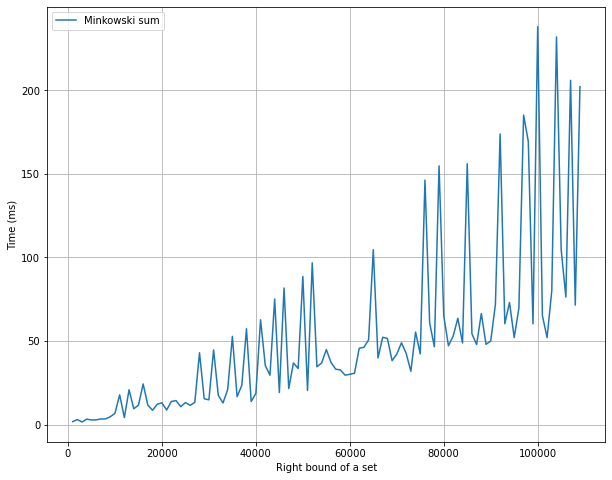

In [9]:
res=test_minkowski_sum(100, 110000, 1000)

MPIR:


target is fixed at 5000 and we change the number of integers

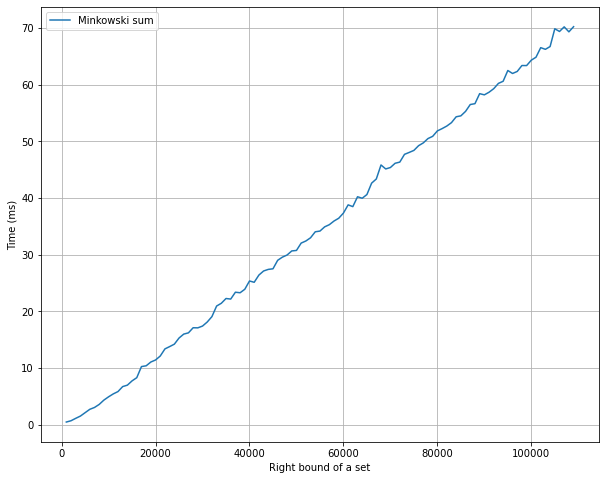

[0.4549,
 0.68102,
 1.10651,
 1.507,
 2.10598,
 2.70107,
 3.02564,
 3.56343,
 4.32654,
 4.90715,
 5.42232,
 5.83131,
 6.71099,
 6.96602,
 7.72109,
 8.28313,
 10.2436,
 10.3802,
 11.0502,
 11.4065,
 12.1087,
 13.3673,
 13.7717,
 14.2001,
 15.2849,
 15.9754,
 16.1972,
 17.0969,
 17.0798,
 17.3951,
 18.1074,
 19.0604,
 20.9317,
 21.4155,
 22.2589,
 22.1607,
 23.3682,
 23.2738,
 23.89,
 25.3525,
 25.1225,
 26.3948,
 27.1164,
 27.3976,
 27.5027,
 29.0018,
 29.56,
 29.9335,
 30.6548,
 30.7437,
 32.041,
 32.4107,
 32.98,
 34.036,
 34.1612,
 34.9056,
 35.2912,
 35.9396,
 36.4264,
 37.339,
 38.7879,
 38.4772,
 40.2186,
 39.9573,
 40.6102,
 42.6208,
 43.3589,
 45.8312,
 45.1283,
 45.3795,
 46.1287,
 46.337,
 47.7051,
 48.0434,
 48.4021,
 49.2339,
 49.7249,
 50.4913,
 50.8845,
 51.8434,
 52.2443,
 52.6963,
 53.3009,
 54.3352,
 54.4996,
 55.289,
 56.4995,
 56.6485,
 58.4158,
 58.2077,
 58.6701,
 59.2974,
 60.2318,
 60.6033,
 62.504,
 61.9794,
 62.3377,
 63.3837,
 63.3743,
 64.3295,
 64.8507,
 66.5

In [37]:
res=test_minkowski_sum(100, 110000, 1000)

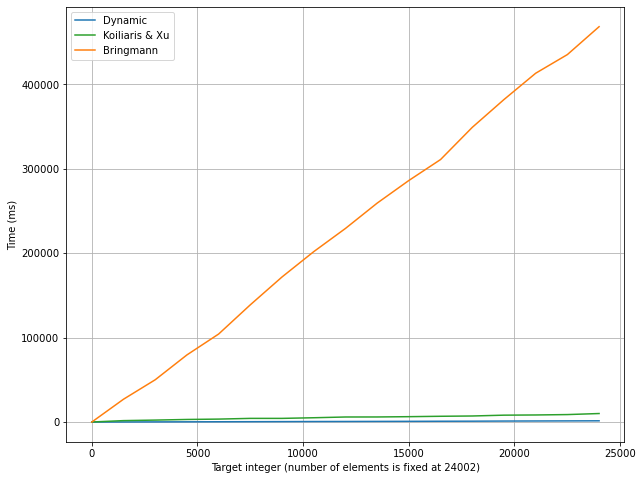

In [9]:
res = test_t_fixed(t=35000, right_bound=30000, n_upper_b=25000, n_step=1500)

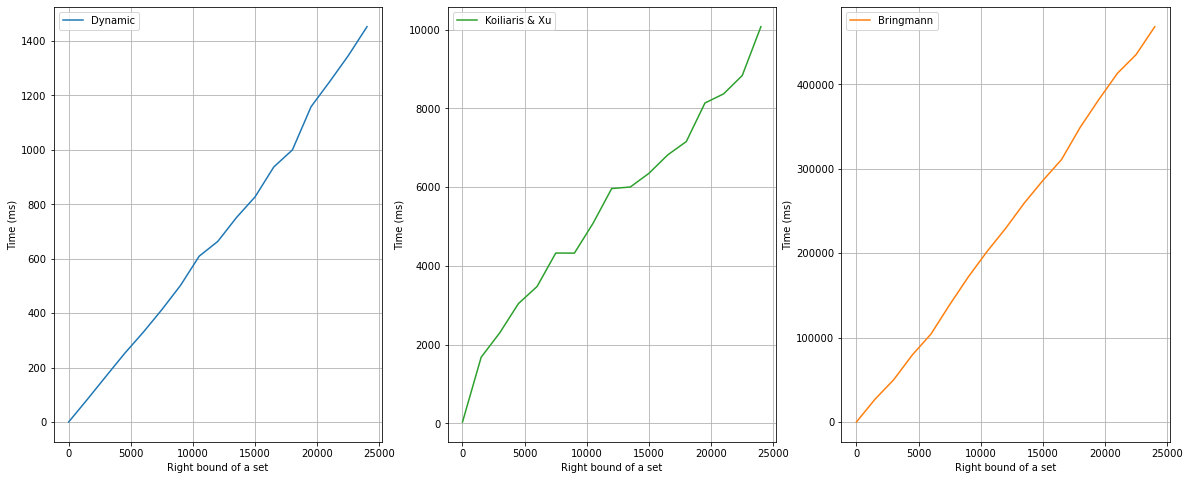

In [11]:
params = list(range(2, 25000, 1500))
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

axs[0].plot(params, res[0], color="tab:blue", label="Dynamic")
axs[0].set_xlabel(f"Right bound of a set")
axs[0].set_ylabel("Time (ms)")
axs[0].legend()
axs[0].grid()

axs[1].plot(params, res[1], color="tab:green", label="Koiliaris & Xu")
axs[1].set_xlabel(f"Right bound of a set")
axs[1].set_ylabel("Time (ms)")
axs[1].legend()
axs[1].grid()

axs[2].plot(params, res[2], color="tab:orange", label="Bringmann")
axs[2].set_xlabel(f"Right bound of a set")
axs[2].set_ylabel("Time (ms)")
axs[2].legend()
axs[2].grid()

plt.show()
    

Number of integers is fixed

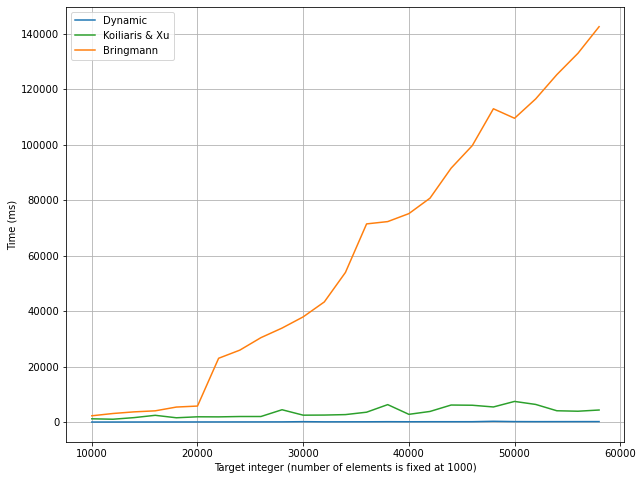

In [9]:
res = test_n_fixed(n=1000, right_bound=10000, t_upper_b=60000, t_step=2000)

koiliaris with altered polymul and bringmann with dynamic subprocedure

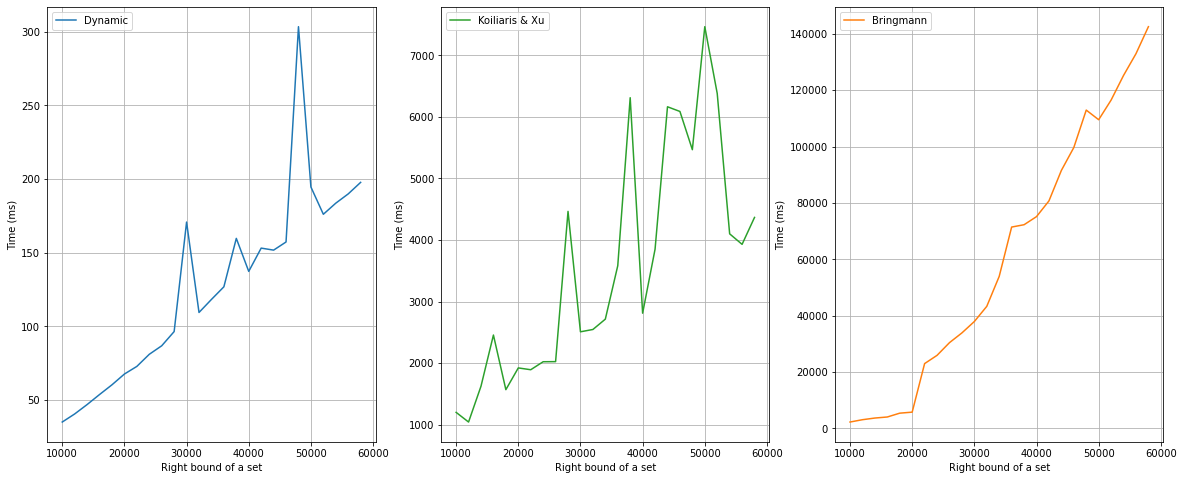

In [10]:
params = list(range(10000, 60000, 2000))
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

axs[0].plot(params, res[0], color="tab:blue", label="Dynamic")
axs[0].set_xlabel(f"Right bound of a set")
axs[0].set_ylabel("Time (ms)")
axs[0].legend()
axs[0].grid()

axs[1].plot(params, res[1], color="tab:green", label="Koiliaris & Xu")
axs[1].set_xlabel(f"Right bound of a set")
axs[1].set_ylabel("Time (ms)")
axs[1].legend()
axs[1].grid()

axs[2].plot(params, res[2], color="tab:orange", label="Bringmann")
axs[2].set_xlabel(f"Right bound of a set")
axs[2].set_ylabel("Time (ms)")
axs[2].legend()
axs[2].grid()

plt.show()
    

initial implementation

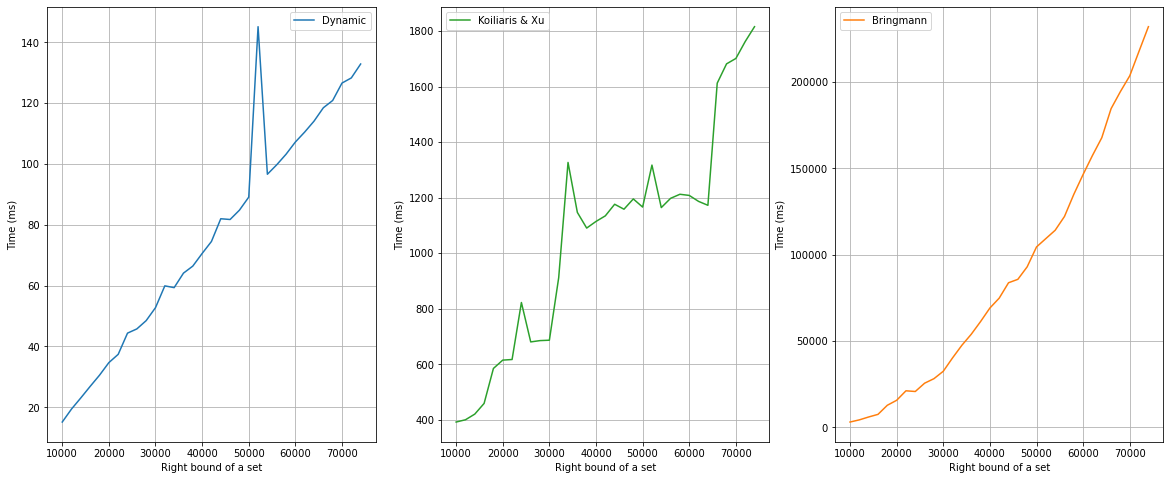

In [67]:
params = list(range(10000, 76000, 2000))
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

axs[0].plot(params, res[0], color="tab:blue", label="Dynamic")
axs[0].set_xlabel(f"Right bound of a set")
axs[0].set_ylabel("Time (ms)")
axs[0].legend()
axs[0].grid()

axs[1].plot(params, res[1], color="tab:green", label="Koiliaris & Xu")
axs[1].set_xlabel(f"Right bound of a set")
axs[1].set_ylabel("Time (ms)")
axs[1].legend()
axs[1].grid()

axs[2].plot(params, res[2], color="tab:orange", label="Bringmann")
axs[2].set_xlabel(f"Right bound of a set")
axs[2].set_ylabel("Time (ms)")
axs[2].legend()
axs[2].grid()

plt.show()
    

### Changing N and t

ValueError: x and y must have same first dimension, but have shapes (21,) and (0,)

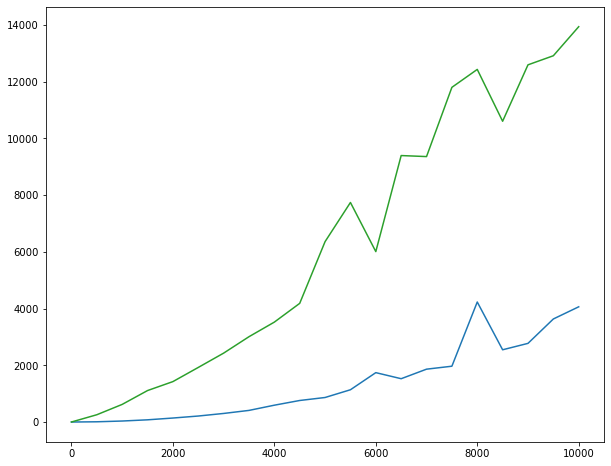

In [9]:
res = test_nt(multiplier=10, upper_b=10000, step=500)

NameError: name 'res' is not defined

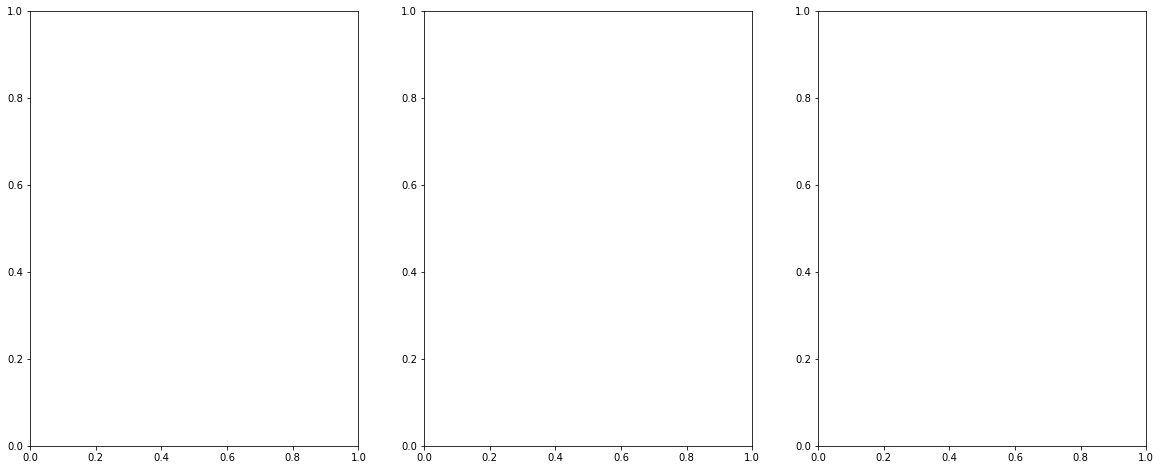

In [10]:
params = list(range(2, 10003, 500))
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

axs[0].plot(params, res[0], color="tab:blue", label="Dynamic")
axs[0].set_xlabel(f"Number of elements (target is n*10)")
axs[0].set_ylabel("Time (ms)")
axs[0].legend()
axs[0].grid()

axs[1].plot(params, res[1], color="tab:green", label="Koiliaris & Xu")
axs[1].set_xlabel(f"Number of elements (target is n*10)")
axs[1].set_ylabel("Time (ms)")
axs[1].legend()
axs[1].grid()

axs[2].plot(params, res[2], color="tab:orange", label="Bringmann")
axs[2].set_xlabel(f"Number of elements (target is n*10)")
axs[2].set_ylabel("Time (ms)")
axs[2].legend()
axs[2].grid()

plt.show()

Initial

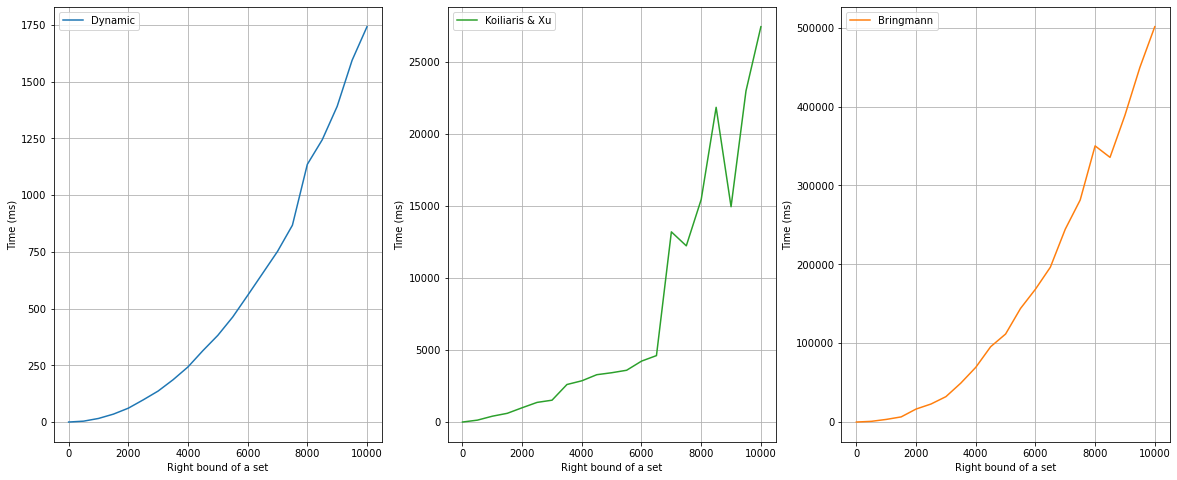

In [52]:
params = list(range(2, 10003, 500))
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

axs[0].plot(params, res[0], color="tab:blue", label="Dynamic")
axs[0].set_xlabel(f"Right bound of a set")
axs[0].set_ylabel("Time (ms)")
axs[0].legend()
axs[0].grid()

axs[1].plot(params, res[1], color="tab:green", label="Koiliaris & Xu")
axs[1].set_xlabel(f"Right bound of a set")
axs[1].set_ylabel("Time (ms)")
axs[1].legend()
axs[1].grid()

axs[2].plot(params, res[2], color="tab:orange", label="Bringmann")
axs[2].set_xlabel(f"Right bound of a set")
axs[2].set_ylabel("Time (ms)")
axs[2].legend()
axs[2].grid()

plt.show()
    

## ColorCoding test

In [10]:
def test_nt_cc(multiplier, upper_b, step):
    times = []

    
    
    upper_b += 3
    params = list(range(2, upper_b, step))
    

    for param in params:
        generate_instance(left_bound=1,
                      right_bound=param*multiplier,
                      num_int=param,
                      target=param*multiplier, 
                      out_filename="cpp_implementations/input.txt",
                      verbose=False)

        times.append(run_cpp_impl("colorcoding", 1,
                                          alg_fin_path="cpp_implementations/input.txt", verbose=False)[1])
        


    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot(params, times, color="tab:blue", label="ColorCoding")
   

    ax.set_xlabel(f"Number of elements (target is n*10)")
    ax.set_ylabel("Time (ms)")
    ax.grid()
    ax.legend()
    plt.show()
    
    return times

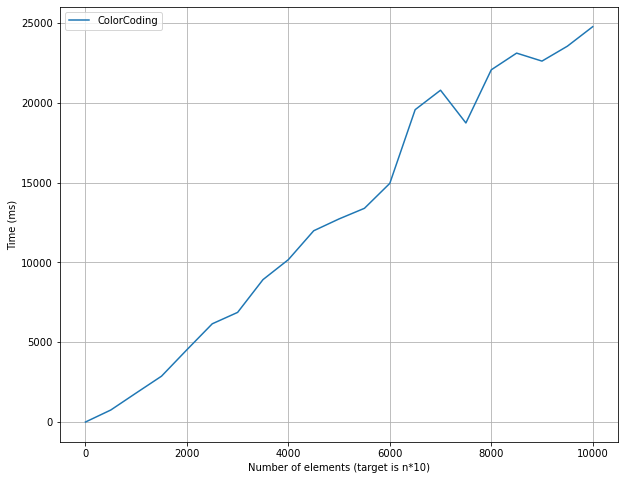

[0.0018,
 753.878,
 1818.89,
 2872.93,
 4527.1,
 6153.13,
 6867.45,
 8919.75,
 10170.2,
 11980.6,
 12722.3,
 13386.3,
 14948.7,
 19565.5,
 20783.4,
 18732.0,
 22060.3,
 23107.2,
 22607.2,
 23539.6,
 24762.4]

In [11]:
test_nt_cc(multiplier=10, upper_b=10000, step=500)

## ColorCodingLayer test

In [6]:
def test_n_fixed_ccl(n, right_bound, t_upper_b, t_step):
    times = []
    
    ts = list(range(right_bound, t_upper_b, t_step))
    

    for t in ts:
        generate_instance(left_bound=math.ceil(t/16),
                      right_bound=math.ceil(t/16*2),
                      num_int=n,
                      target=t, 
                      out_filename="cpp_implementations/input.txt",
                      verbose=False, seed=42)

        times.append(run_cpp_impl("colorcodinglayer", 1, alg_fin_path="cpp_implementations/input.txt", verbose=False)[1])


    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot(ts, times, color="tab:blue", label="ColorCodingLayer")


    ax.set_xlabel(f"Target integer (number of elements is fixed at {n})")
    ax.set_ylabel("Time (ms)")
    ax.grid()
    ax.legend()
    plt.show()
    
    
    return times

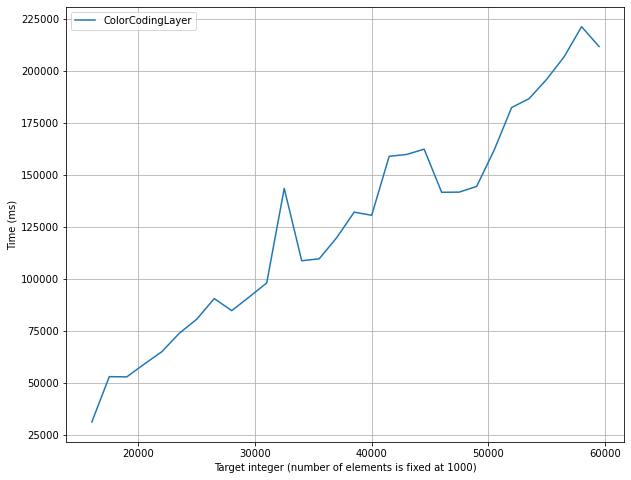

[31223.2,
 53035.3,
 52915.8,
 59076.5,
 64985.3,
 73855.5,
 80630.1,
 90536.5,
 84738.5,
 91327.9,
 98076.6,
 143477.0,
 108702.0,
 109653.0,
 119792.0,
 132067.0,
 130565.0,
 158891.0,
 159794.0,
 162322.0,
 141603.0,
 141687.0,
 144418.0,
 161838.0,
 182329.0,
 186604.0,
 195852.0,
 206686.0,
 221171.0,
 211612.0]

In [9]:
test_n_fixed_ccl(1000, 16000, 60000, 1500)